In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv('CMHS_average_result.csv')
file.tail()

,key,avg_mcc,avg_mf1,avg_wf1,avg_acc
507,507,0.007969,0.416367,0.466713,0.557460
508,508,0.009965,0.418604,0.469951,0.558900
509,509,0.006824,0.413391,0.468671,0.561924
510,510,0.013446,0.416513,0.471829,0.565236
511,511,0.002976,0.411878,0.466021,0.561132


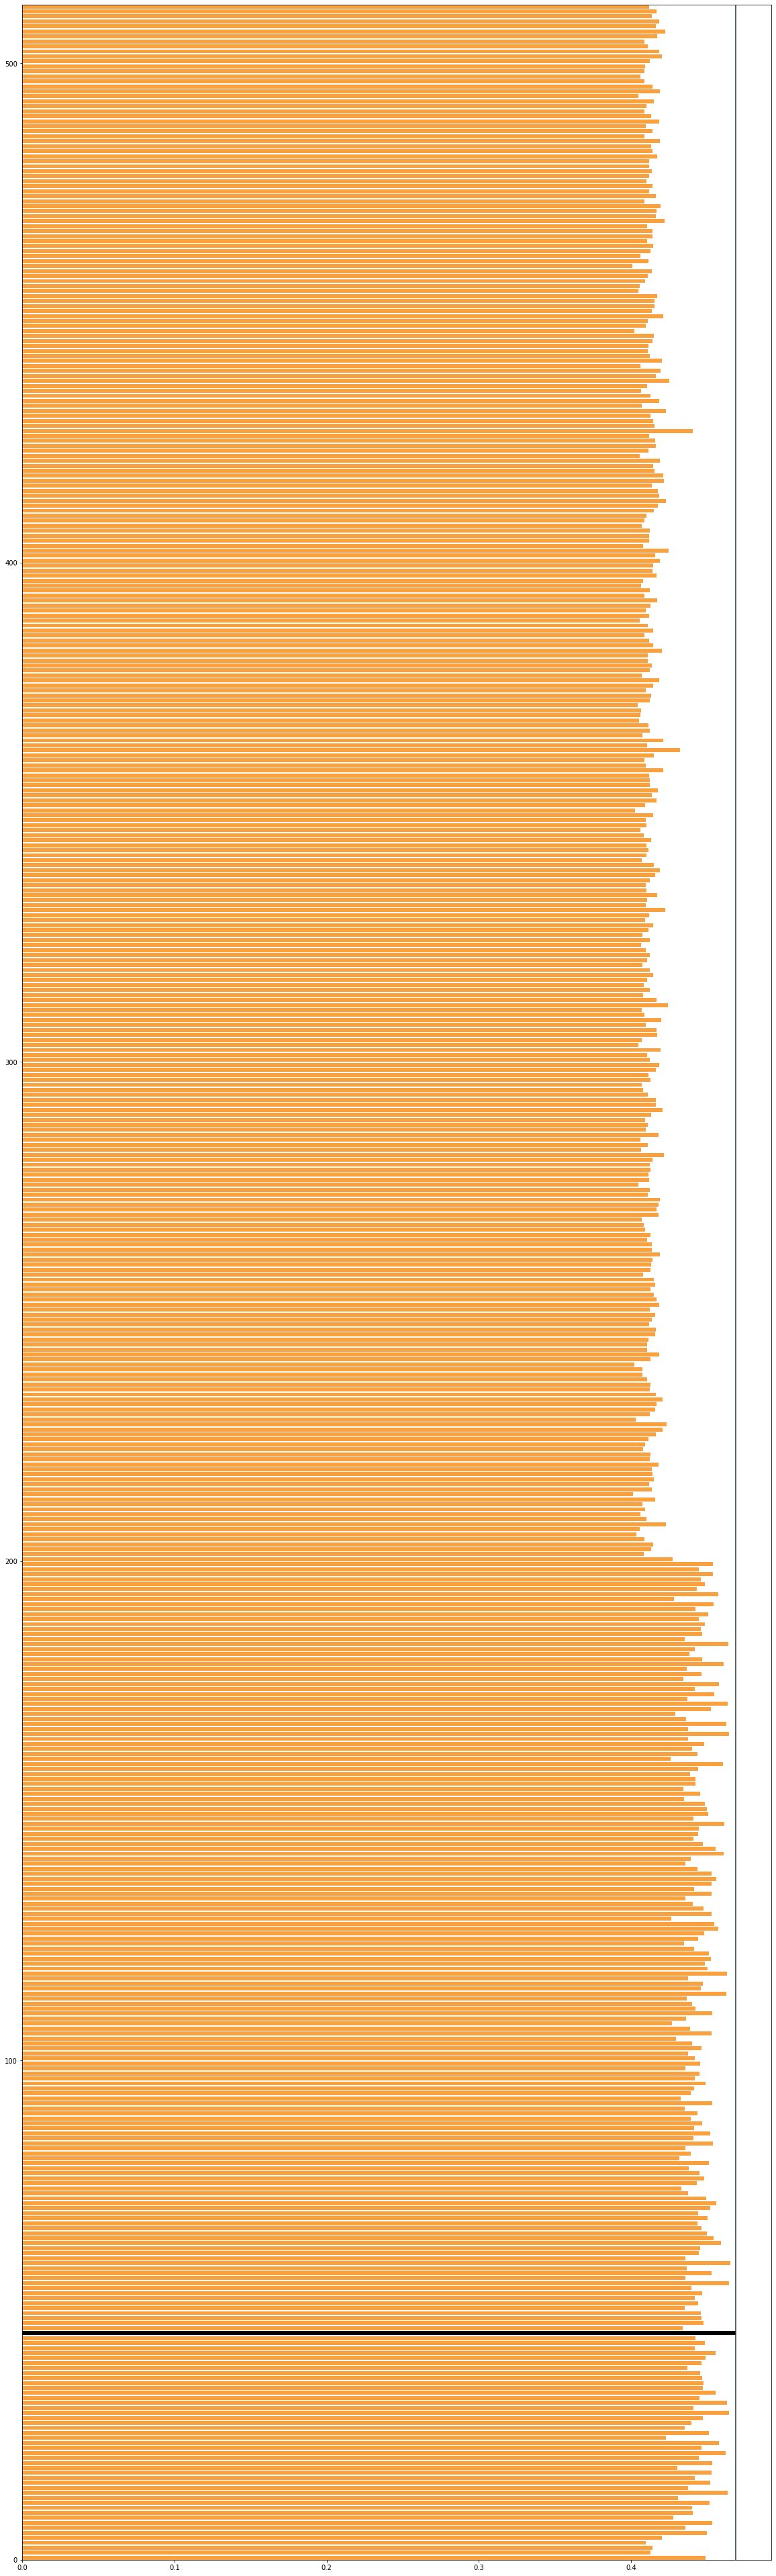

In [6]:
index_max = file[file['avg_mf1']==max(file['avg_mf1'])].index[0]
plt.figure(figsize=(20,70))
#color
c=[]
for i in range(0,len(file)):
    if i!=index_max:
        c.append('#f9a03f')
    else:
        c.append('#000000')

plt.barh(file['key'],file['avg_mf1'],color = c,align='edge')
# setting x-label as pen sold
#plt.xlabel("Average Macro-F1")

# setting y_label as price
#plt.ylabel("Keys")  
#plt.title("Average Macro-F1 performance of various combination of pre-processing steps")
plt.margins(y=0)
plt.axvline(x =max(file['avg_mf1']), color = '#183a37',)
#plt.yticks(file['key'])
plt.savefig('CMHS_average_mf1.png',transparent=False,format='png',bbox_inches="tight", pad_inches=0)
plt.show()

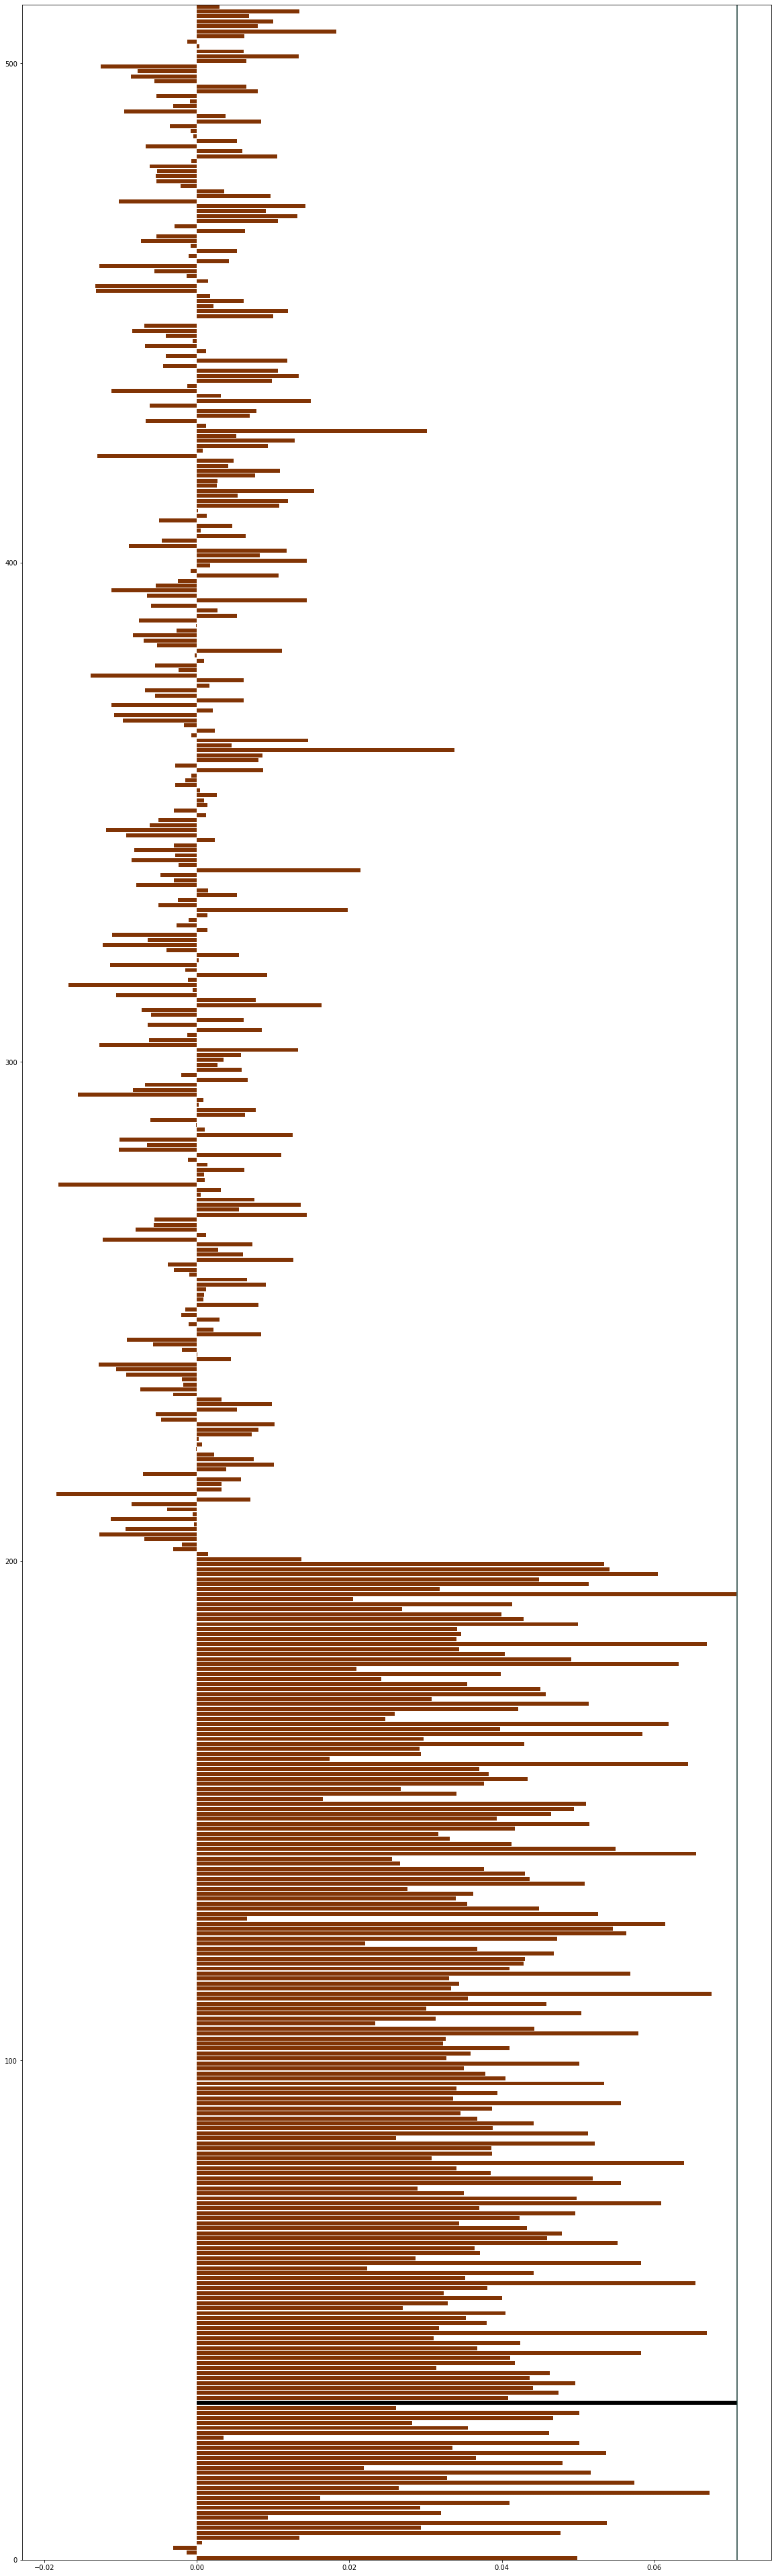

In [4]:
index_max = file[file['avg_mcc']==max(file['avg_mcc'])].index[0]
plt.figure(figsize=(20,70))
#color
c=[]
for i in range(0,len(file)):
    if i!=index_max:
        c.append('#813405')
    else:
        c.append('#000000')

plt.barh(file['key'],file['avg_mcc'],color = c,align='edge')
# setting x-label as pen sold
#plt.xlabel("Average MCC")

# setting y_label as price
#plt.ylabel("Keys")  
#plt.title("Average MCC performance of various combination of pre-processing steps")
plt.margins(y=0)
plt.axvline(x =max(file['avg_mcc']), color = '#183a37',)
#plt.yticks(file['key'])
plt.savefig('CMHS_average_mcc.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
plt.show()

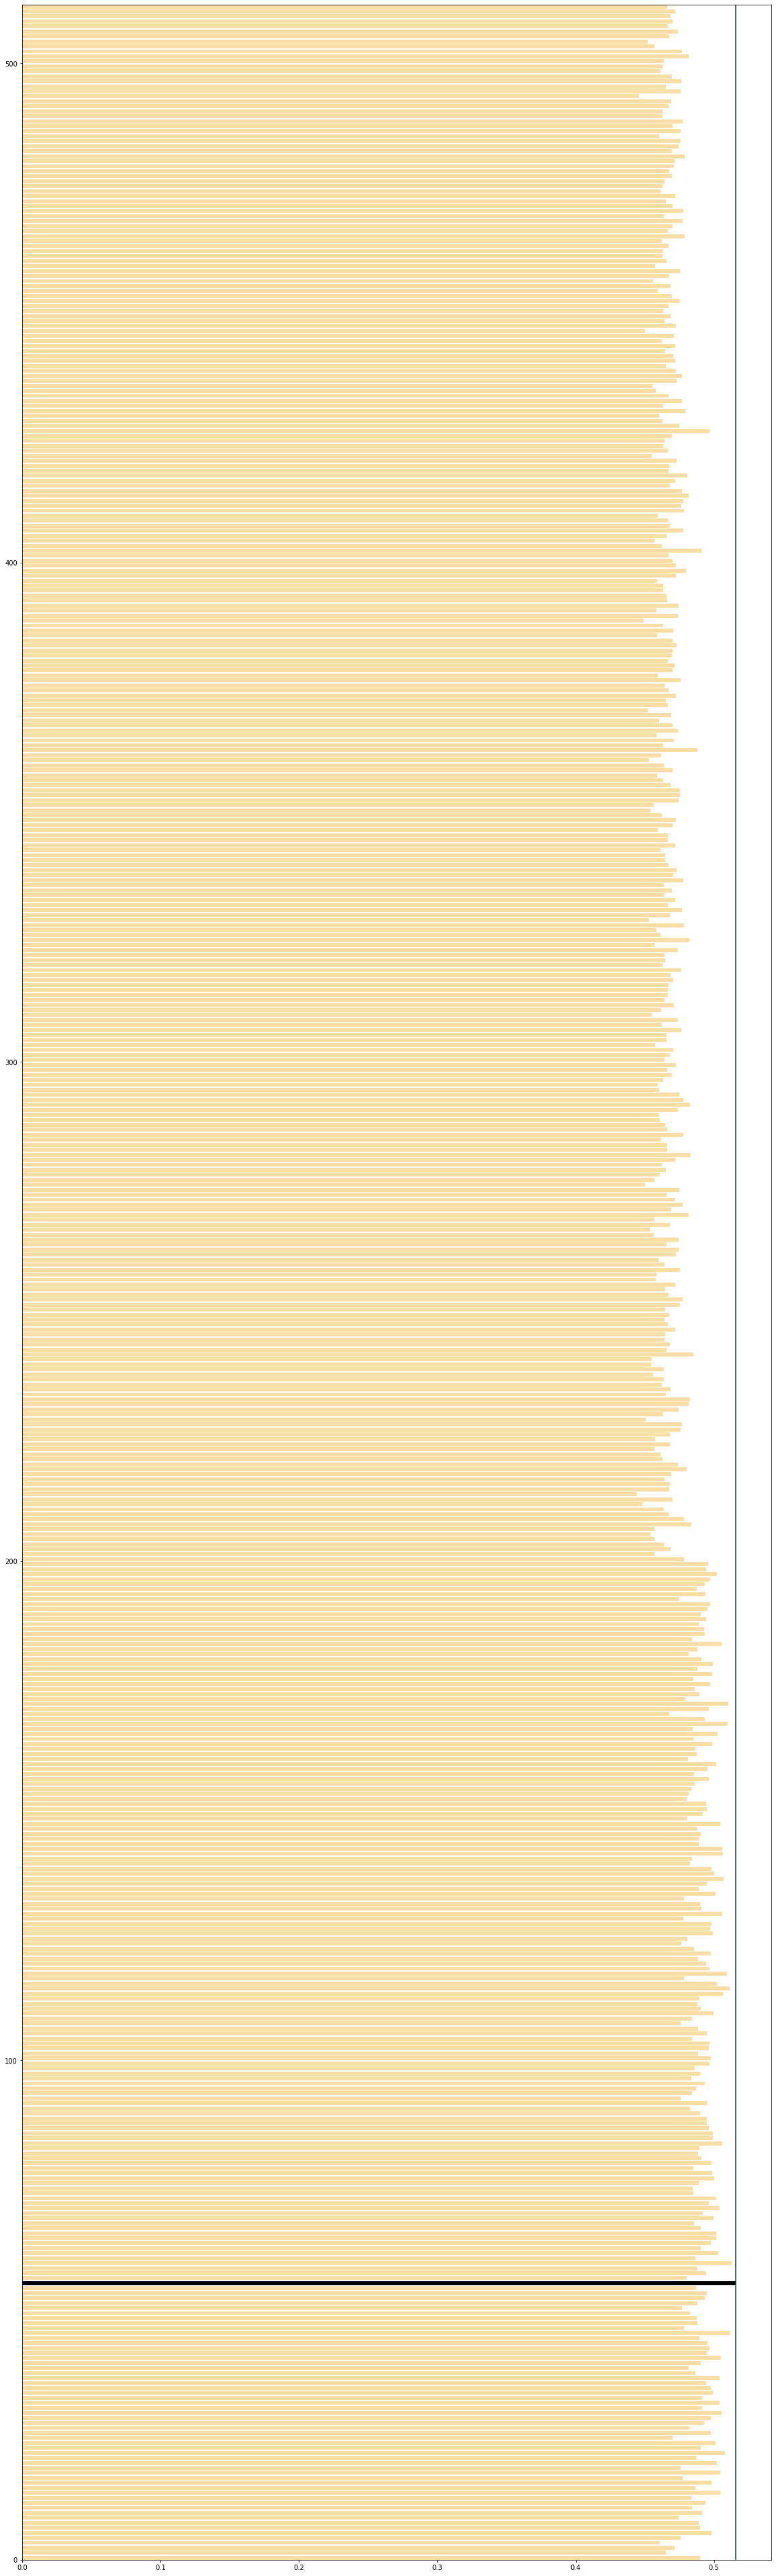

In [7]:
index_max = file[file['avg_wf1']==max(file['avg_wf1'])].index[0]
plt.figure(figsize=(20,70))
#color
c=[]
for i in range(0,len(file)):
    if i!=index_max:
        c.append('#f8dda4')
    else:
        c.append('#000000')

plt.barh(file['key'],file['avg_wf1'],color = c,align='edge')
# setting x-label as pen sold
#plt.xlabel("Average Weighted-F1")

# setting y_label as price
#plt.ylabel("Keys")  
#plt.title("Average Weighted-F1 performance of various combination of pre-processing steps")
plt.margins(y=0)
plt.axvline(x =max(file['avg_wf1']), color = '#183a37',)
#plt.yticks(file['key'])
plt.savefig('CMHS_average_wf1.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
plt.show()

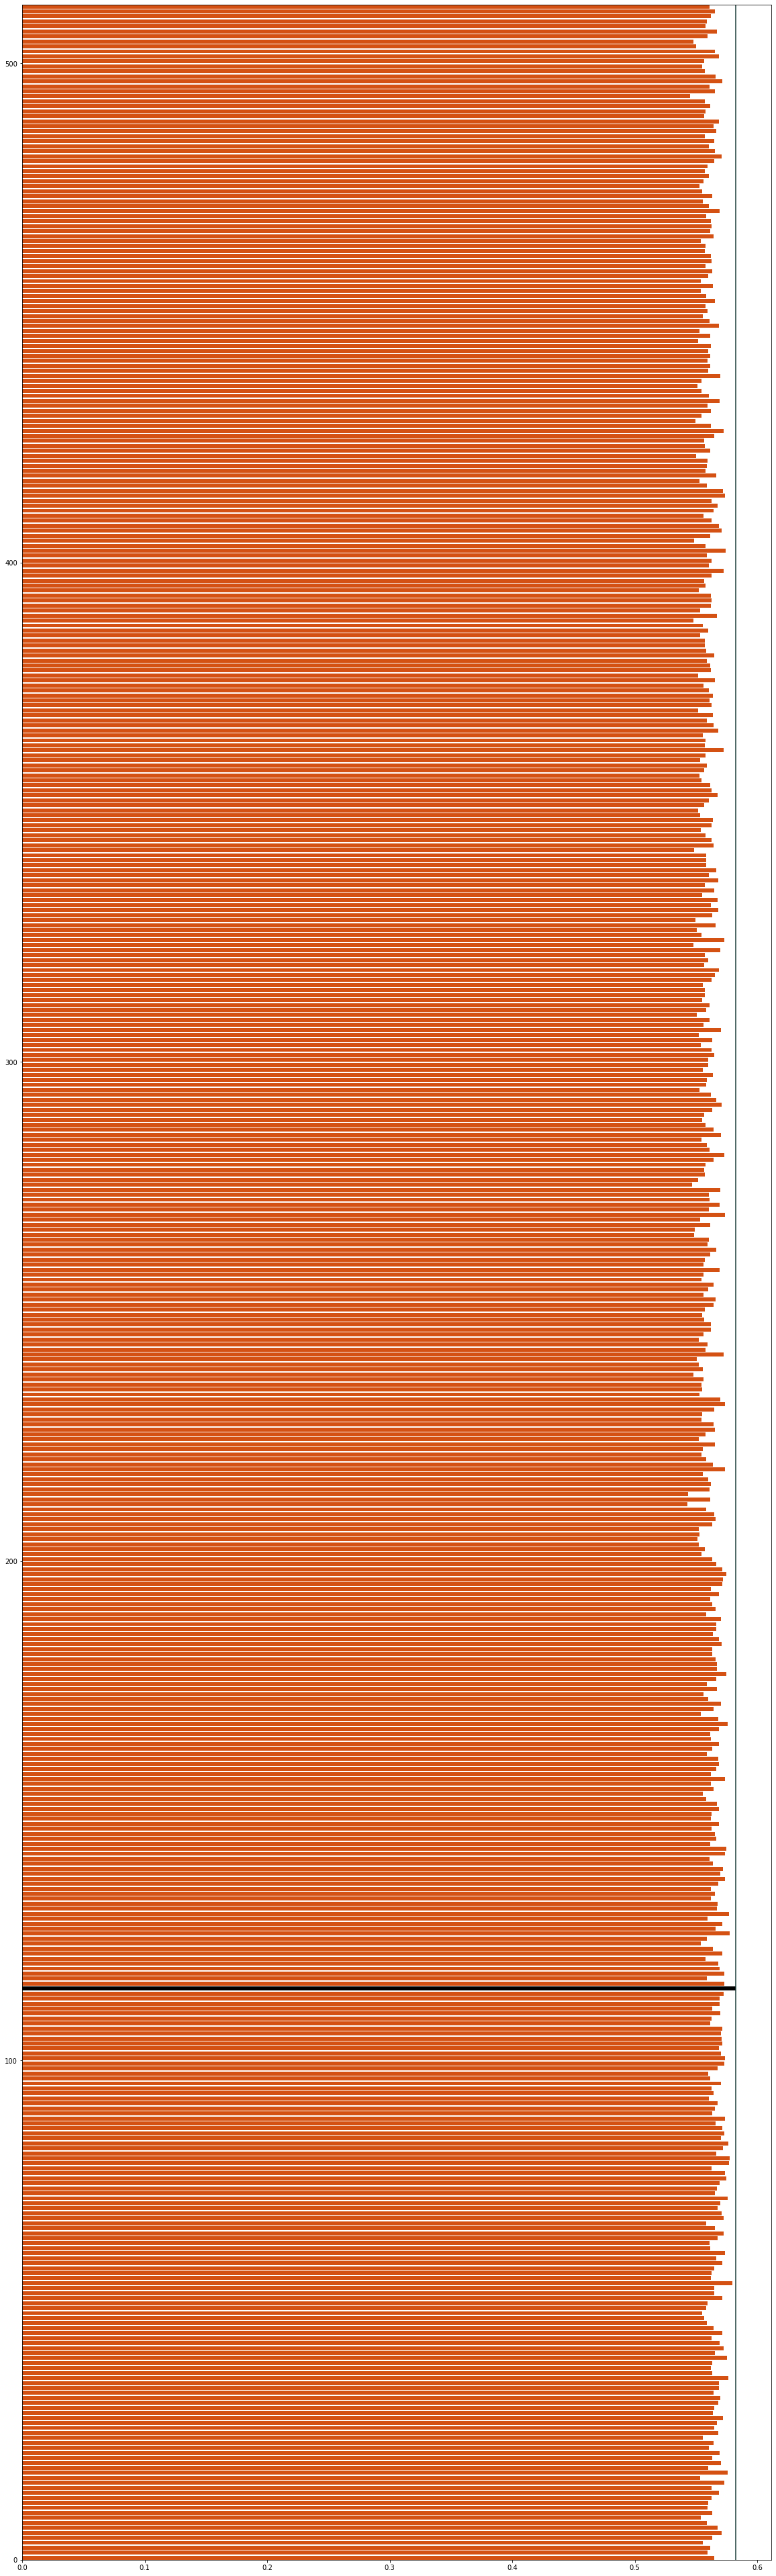

In [5]:
index_max = file[file['avg_acc']==max(file['avg_acc'])].index[0]
plt.figure(figsize=(20,70))
#color
c=[]
for i in range(0,len(file)):
    if i!=index_max:
        c.append('#d45113')
    else:
        c.append('#000000')

plt.barh(file['key'],file['avg_acc'],color = c,align='edge')
# setting x-label as pen sold
#plt.xlabel("Average Accuracy")

# setting y_label as price
#plt.ylabel("Keys")  
#plt.title("Average accuracy performance of various combination of pre-processing steps")
plt.margins(y=0)
plt.axvline(x =max(file['avg_acc']), color = '#183a37',)
#plt.yticks(file['key'])
plt.savefig('CMHS_average_acc.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
plt.show()

## HeatMap

In [2]:
file2 = pd.read_csv('CMHS_preprocessing_result.csv')

In [391]:
file2.iloc[file2[file2['mcc']==max(file2['mcc'])].index[0]]

key                    90
tokenizer    MWETokenizer
technique          BiLSTM
mcc              0.328736
m_f1             0.616208
w_f1             0.672369
acc               0.71371
Name: 5087, dtype: object

In [413]:
file2.iloc[file2[file2['m_f1']==max(file2['m_f1'])].index[0]]

key                   115
tokenizer    MWETokenizer
technique          BiLSTM
mcc              0.328486
m_f1             0.662944
w_f1              0.69701
acc              0.701613
Name: 6487, dtype: object

In [387]:
file3=pd.read_csv('../../experiment_data.csv')

In [414]:
file3[file3['key']==115]

,key,hashtag,userhandles,hyperlinks,emoji,emoticons,word_slangs,expanding_contraction,elongated_chararcters,replace_elongated_words,alphanumeric_slangs,remove_punctuations,capitalized_words,recurrent_word,Split_MixCase,Split_MixScript,misspled_words,stopwords_removal
115,115,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,1


### MCC

In [9]:
mcc_key=file2.iloc[file2[file2['mcc']==max(file2['mcc'])].index[0]]['key']
mcc_hmap={}
start = file2[file2['key']==mcc_key].index[0]
for tknzr in file2[file2['key']==mcc_key]['tokenizer'].unique():
    mcc_demo=[]
    for i in range(start,start+8):
        mcc_demo.append(file2.iloc[i]['mcc'])
    start=i+1
    mcc_hmap[tknzr]=mcc_demo    


In [10]:
row=['LSTM','GB','SGDC','LR','KNN','BNB','CNN','BiLSTM']
mcc_hmap_df=pd.DataFrame(mcc_hmap,index=row)

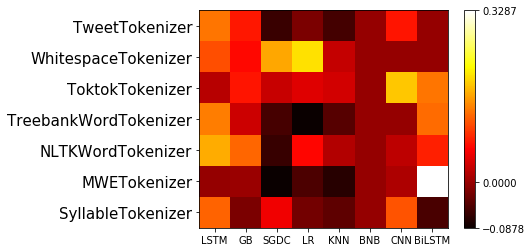

In [11]:
#plt.figure(figsize=(10,10))
plt.yticks(range(len(mcc_hmap_df.columns)),\
		mcc_hmap_df.columns,fontsize=15)
plt.xticks(range(len(row)),
		row,fontsize=10)
plt.imshow(mcc_hmap_df.transpose(),cmap='hot',interpolation='nearest')
cbar = plt.colorbar(ticks=[min(file2[file2['key']==mcc_key]['mcc']), 0.0, max(file2[file2['key']==mcc_key]['mcc'])])
plt.savefig('CMHS_heatmap_mcc.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
#cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

### M-F1

In [12]:
mf1_key=file2.iloc[file2[file2['m_f1']==max(file2['m_f1'])].index[0]]['key']
mf1_hmap={}
start = file2[file2['key']==mf1_key].index[0]
for tknzr in file2[file2['key']==mf1_key]['tokenizer'].unique():
    mf1_demo=[]
    for i in range(start,start+8):
        mf1_demo.append(file2.iloc[i]['m_f1'])
    start=i+1
    mf1_hmap[tknzr]=mf1_demo    
row=['LSTM','GB','SGDC','LR','KNN','BNB','CNN','BiLSTM']
mf1_hmap_df=pd.DataFrame(mf1_hmap,index=row)

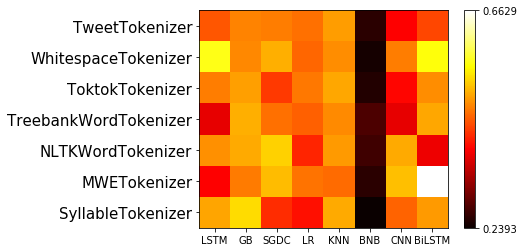

In [13]:
#plt.figure(figsize=(10,10))
plt.yticks(range(len(mf1_hmap_df.columns)),\
		mf1_hmap_df.columns,fontsize=15)
plt.xticks(range(len(row)),
		row,fontsize=10)
plt.imshow(mf1_hmap_df.transpose(),cmap='hot',interpolation='nearest')
cbar = plt.colorbar(ticks=[min(file2[file2['key']==mf1_key]['m_f1']), 0.0, max(file2[file2['key']==mf1_key]['m_f1'])])
plt.savefig('CMHS_heatmap_mf1.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
#cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

### W-F1

In [14]:
wf1_key=file2.iloc[file2[file2['w_f1']==max(file2['w_f1'])].index[0]]['key']
wf1_hmap={}
start = file2[file2['key']==wf1_key].index[0]
for tknzr in file2[file2['key']==wf1_key]['tokenizer'].unique():
    wf1_demo=[]
    for i in range(start,start+8):
        wf1_demo.append(file2.iloc[i]['w_f1'])
    start=i+1
    wf1_hmap[tknzr]=wf1_demo    
row=['LSTM','GB','SGDC','LR','KNN','BNB','CNN','BiLSTM']
wf1_hmap_df=pd.DataFrame(wf1_hmap,index=row)

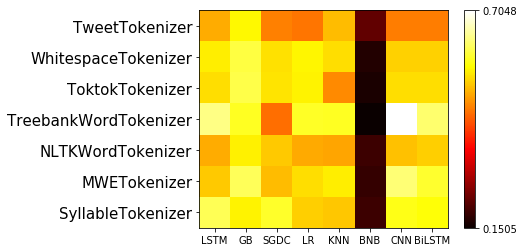

In [15]:
#plt.figure(figsize=(10,10))
plt.yticks(range(len(wf1_hmap_df.columns)),\
		wf1_hmap_df.columns,fontsize=15)
plt.xticks(range(len(row)),
		row,fontsize=10)
plt.imshow(wf1_hmap_df.transpose(),cmap='hot',interpolation='nearest')
cbar = plt.colorbar(ticks=[min(file2[file2['key']==wf1_key]['w_f1']), 0.0, max(file2[file2['key']==wf1_key]['w_f1'])])
plt.savefig('CMHS_heatmap_wf1.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
#cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

### Accuracy

In [16]:
acc_key=file2.iloc[file2[file2['acc']==max(file2['acc'])].index[0]]['key']
acc_hmap={}
start = file2[file2['key']==acc_key].index[0]
for tknzr in file2[file2['key']==acc_key]['tokenizer'].unique():
    acc_demo=[]
    for i in range(start,start+8):
        acc_demo.append(file2.iloc[i]['acc'])
    start=i+1
    acc_hmap[tknzr]=acc_demo    
row=['LSTM','GB','SGDC','LR','KNN','BNB','CNN','BiLSTM']
acc_hmap_df=pd.DataFrame(acc_hmap,index=row)

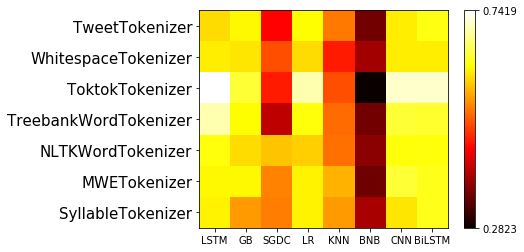

In [17]:
#plt.figure(figsize=(10,10))
plt.yticks(range(len(acc_hmap_df.columns)),\
		acc_hmap_df.columns,fontsize=15)
plt.xticks(range(len(row)),
		row,fontsize=10)
plt.imshow(acc_hmap_df.transpose(),cmap='hot',interpolation='nearest')
cbar = plt.colorbar(ticks=[min(file2[file2['key']==acc_key]['acc']), 0.0, max(file2[file2['key']==acc_key]['acc'])])
plt.savefig('CMHS_heatmap_acc.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
#cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

## Standard Deviation

#### Deviation in scores due to pre-processing steps

In [365]:
mcc_sd={}
mf1_sd={}
wf1_sd={}
acc_sd={}
for tchnq in file2['technique'].unique():
    for tknzr in file2['tokenizer'].unique():
        mcc_sd[tchnq+'_'+tknzr]=[mcc_val for mcc_val in file2[(file2['technique']==tchnq) & (file2['tokenizer']==tknzr)]['mcc']]
        mf1_sd[tchnq+'_'+tknzr]=[mf1_val for mf1_val in file2[(file2['technique']==tchnq) & (file2['tokenizer']==tknzr)]['m_f1']]
        wf1_sd[tchnq+'_'+tknzr]=[wf1_val for wf1_val in file2[(file2['technique']==tchnq) & (file2['tokenizer']==tknzr)]['w_f1']]
        acc_sd[tchnq+'_'+tknzr]=[acc_val for acc_val in file2[(file2['technique']==tchnq) & (file2['tokenizer']==tknzr)]['acc']]
#tkth_cmhs_df = pd.DataFrame(std_cmhs)

In [373]:
sd_cmhs_df={}
for i in range(0,512):
    sd_cmhs_df[i]=[int(i*1)*1,
                    pd.DataFrame(mcc_sd).transpose()[i].std(),
                    pd.DataFrame(mf1_sd).transpose()[i].std(),
                   pd.DataFrame(wf1_sd).transpose()[i].std(),
                   pd.DataFrame(acc_sd).transpose()[i].std()]
sd_cmhs_d=pd.DataFrame(sd_cmhs_df, index=['key','MCC_SD','MF1_SD','WF1_SD','ACC_SD']).transpose()
sd_cmhs_d.tail()

,key,mcc_sd,mf1_sd,wf1_sd,acc_sd
507,507.0,0.047158,0.070306,0.108775,0.096506
508,508.0,0.041874,0.078243,0.115565,0.099965
509,509.0,0.054206,0.074367,0.116141,0.105906
510,510.0,0.046394,0.075541,0.113147,0.097614
511,511.0,0.042992,0.070848,0.109357,0.096412


In [379]:
print('maximum mcc deviation is',max(sd_cmhs_d['MCC_SD']),'for key ',sd_cmhs_d[sd_cmhs_d['MCC_SD']==max(sd_cmhs_d['MCC_SD'])]['key'])
print('maximum m_f1 deviation is',max(sd_cmhs_d['MF1_SD']),'for key ',sd_cmhs_d[sd_cmhs_d['MF1_SD']==max(sd_cmhs_d['MF1_SD'])]['key'])
print('maximum w_f1 deviation is',max(sd_cmhs_d['WF1_SD']),'for key ',sd_cmhs_d[sd_cmhs_d['WF1_SD']==max(sd_cmhs_d['WF1_SD'])]['key'])
print('maximum acc deviation is',max(sd_cmhs_d['ACC_SD']),'for key ',sd_cmhs_d[sd_cmhs_d['ACC_SD']==max(sd_cmhs_d['ACC_SD'])]['key'])

maximum mcc deviation is 0.09850549242757209 for key  11    11.0
Name: key, dtype: float64
maximum m_f1 deviation is 0.09579966607070606 for key  159    159.0
Name: key, dtype: float64
maximum w_f1 deviation is 0.13771263774272616 for key  114    114.0
Name: key, dtype: float64
maximum acc deviation is 0.1146928741242457 for key  208    208.0
Name: key, dtype: float64


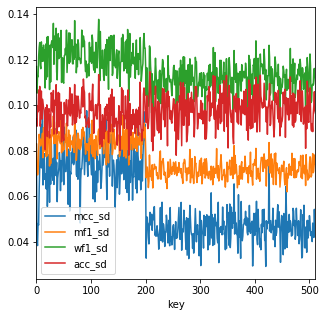

In [422]:
sd_cmhs_d_fig = sd_cmhs_d.plot(x='key',y=['MCC_SD','MF1_SD','WF1_SD','ACC_SD'],figsize=(5,5)).get_figure()
#sd_cmhs_d_fig.savefig('CMHS_sd.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)

In [168]:
#### Deviation in score due to combination of techniques and tokenizers
'''
std_cmhs={}
for i in range(0,512):
    std_cmhs[i]=[int(i),file2[file2['key']==i].std()['mcc'],file2[file2['key']==i].std()['m_f1'],
                file2[file2['key']==i].std()['w_f1'],file2[file2['key']==i].std()['acc']]
row=['key','mcc','m_f1','w_f1','acc']
std_df=pd.DataFrame(std_cmhs,index=row)
std_df=std_df.transpose()
std_df.tail()
'''

,key,mcc,m_f1,w_f1,acc
507,507.0,0.047158,0.070306,0.108775,0.096506
508,508.0,0.041874,0.078243,0.115565,0.099965
509,509.0,0.054206,0.074367,0.116141,0.105906
510,510.0,0.046394,0.075541,0.113147,0.097614
511,511.0,0.042992,0.070848,0.109357,0.096412


In [169]:
'''
print('maximum mcc deviation is',max(std_df['mcc']),'for key ',std_df[std_df['mcc']==max(std_df['mcc'])]['key'])
print('maximum m_f1 deviation is',max(std_df['m_f1']),'for key ',std_df[std_df['m_f1']==max(std_df['m_f1'])]['key'])
print('maximum w_f1 deviation is',max(std_df['w_f1']),'for key ',std_df[std_df['w_f1']==max(std_df['w_f1'])]['key'])
print('maximum acc deviation is',max(std_df['acc']),'for key ',std_df[std_df['acc']==max(std_df['acc'])]['key'])
'''

maximum mcc deviation is 0.09850549242757209 for key  11    11.0
Name: key, dtype: float64
maximum m_f1 deviation is 0.09579966607070606 for key  159    159.0
Name: key, dtype: float64
maximum w_f1 deviation is 0.13771263774272613 for key  114    114.0
Name: key, dtype: float64
maximum acc deviation is 0.11469287412424567 for key  208    208.0
Name: key, dtype: float64


In [ ]:
std_df.plot(x='key',y=['mcc','m_f1','w_f1','acc'],figsize=(15,10))
#std_df.plot(x='key',y='m_f1')

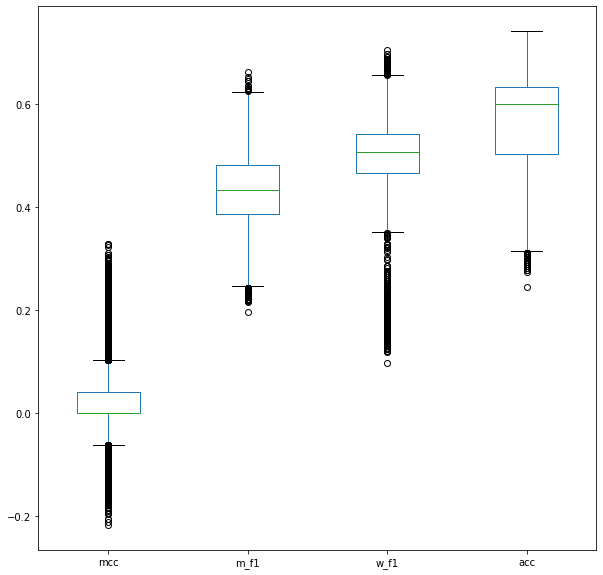

In [188]:
box_df=file2.drop('key',axis=1)
box_df.boxplot(figsize=(10,10),grid=False)

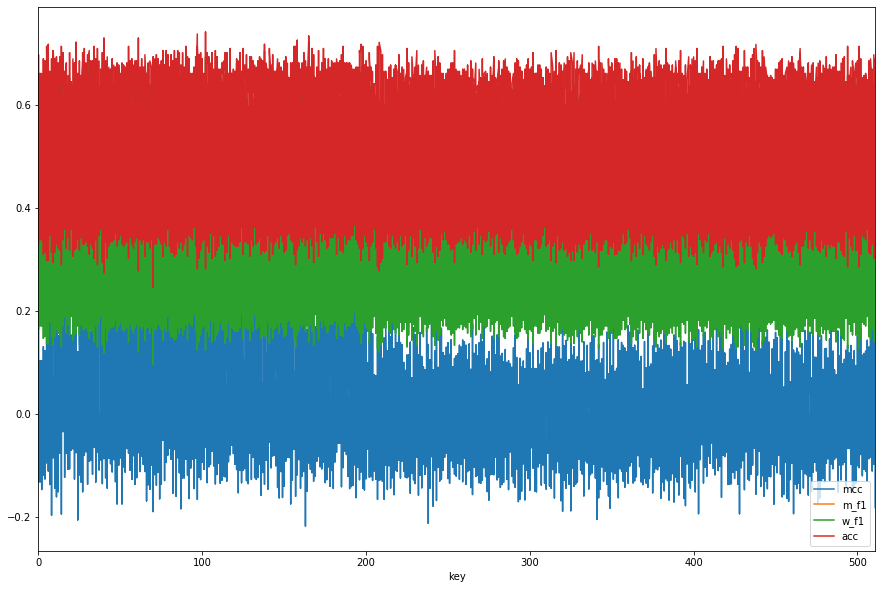

In [189]:
file2.plot(x='key',y=['mcc','m_f1','w_f1','acc'],figsize=(15,10))

## Performance differences

In [3]:
#keeping the tokenizer and technique
perf_diff={}
for tchnq in file2['technique'].unique():
    for tknzr in file2['tokenizer'].unique():
        scr=[]
        for score in ['mcc','m_f1','w_f1','acc']:
            mx=max(file2[(file2['technique']==tchnq) & (file2['tokenizer']==tknzr)][score])
            mn=min(file2[(file2['technique']==tchnq) & (file2['tokenizer']==tknzr)][score])
            scr.append(mx)
            scr.append(mn)
            scr.append(mx-mn)
        perf_diff[tchnq+'_'+tknzr]=scr

In [4]:
perf_diff_df=pd.DataFrame(perf_diff,index=['mcc_mx','mcc_mn','mcc_diff','mf1_mx','mf1_mn','mf1_diff',
                              'wf1_mx','wf1_mn','wf1_diff','acc_mx','acc_mn','acc_diff']).transpose()

In [5]:
## Average difference of scores for combination of techniques and tokenizers
print('Average difference of MCC', sum(perf_diff_df['mcc_diff'])/len(perf_diff_df))
print('Average difference of MF1', sum(perf_diff_df['mf1_diff'])/len(perf_diff_df))
print('Average difference of WF1', sum(perf_diff_df['wf1_diff'])/len(perf_diff_df))
print('Average difference of ACC', sum(perf_diff_df['acc_diff'])/len(perf_diff_df))

Average difference of MCC 0.34438609698805095
Average difference of MF1 0.21714059318428403
Average difference of WF1 0.25121718832964063
Average difference of ACC 0.19772465437788028


In [206]:
perf_diff_df[perf_diff_df['mcc_diff']==max(perf_diff_df['mcc_diff'])]

,mcc_mx,mcc_mn,mcc_diff,mf1_mx,mf1_mn,mf1_diff,wf1_mx,wf1_mn,wf1_diff,acc_mx,acc_mn,acc_diff
LSTM_ToktokTokenizer,0.306814,-0.164782,0.471596,0.649021,0.359173,0.289848,0.691752,0.402621,0.28913,0.741935,0.560484,0.181452


In [199]:
perf_diff_df[perf_diff_df['mf1_diff']==max(perf_diff_df['mf1_diff'])]

,mcc_mx,mcc_mn,mcc_diff,mf1_mx,mf1_mn,mf1_diff,wf1_mx,wf1_mn,wf1_diff,acc_mx,acc_mn,acc_diff
LSTM_TreebankWordTokenizer,0.322242,-0.118541,0.440784,0.652481,0.347368,0.305113,0.691943,0.369779,0.322164,0.71371,0.532258,0.181452


In [200]:
perf_diff_df[perf_diff_df['wf1_diff']==max(perf_diff_df['wf1_diff'])]

,mcc_mx,mcc_mn,mcc_diff,mf1_mx,mf1_mn,mf1_diff,wf1_mx,wf1_mn,wf1_diff,acc_mx,acc_mn,acc_diff
CNN_TreebankWordTokenizer,0.302774,-0.135442,0.438216,0.645425,0.347368,0.298056,0.704828,0.369779,0.335049,0.717742,0.532258,0.185484


In [201]:
perf_diff_df[perf_diff_df['acc_diff']==max(perf_diff_df['acc_diff'])]

,mcc_mx,mcc_mn,mcc_diff,mf1_mx,mf1_mn,mf1_diff,wf1_mx,wf1_mn,wf1_diff,acc_mx,acc_mn,acc_diff
SGDC_WhitespaceTokenizer,0.191497,-0.21726,0.408758,0.583179,0.363441,0.219738,0.624454,0.322185,0.302269,0.673387,0.379032,0.294355


### Circular Barplot

In [227]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [312]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 3
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        )
    return ax

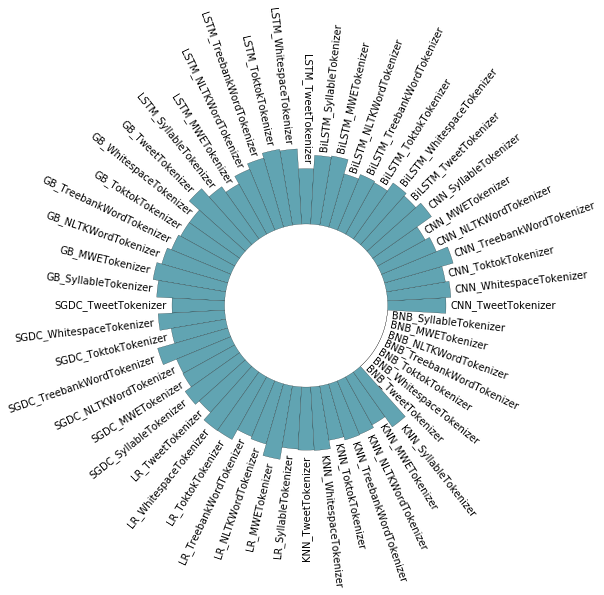

In [273]:
ANGLES = np.linspace(0, 2 * np.pi, len(perf_diff_df), endpoint=False)
VALUES = perf_diff_df["mcc_diff"].values
LABELS = perf_diff_df.index
# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-50, 50)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES*100, width=WIDTH, linewidth=0.2,
    color="#61a4b2", edgecolor="black"
)

# Add labels
add_labels(ANGLES, VALUES*100, LABELS, OFFSET, ax)

In [320]:
C=['#588b8b','#588b8b','#588b8b','#588b8b','#588b8b','#588b8b','#588b8b',
   '#f2e8cf','#f2e8cf','#f2e8cf','#f2e8cf','#f2e8cf','#f2e8cf','#f2e8cf',
   '#ffd5c2','#ffd5c2','#ffd5c2','#ffd5c2','#ffd5c2','#ffd5c2','#ffd5c2',
  '#f28f3b','#f28f3b','#f28f3b','#f28f3b','#f28f3b','#f28f3b','#f28f3b',
   '#c8553d','#c8553d','#c8553d','#c8553d','#c8553d','#c8553d','#c8553d',
   '#2d3047','#2d3047','#2d3047','#2d3047','#2d3047','#2d3047','#2d3047',
   '#93b7be','#93b7be','#93b7be','#93b7be','#93b7be','#93b7be','#93b7be',
   '#00ffff','#00ffff','#00ffff','#00ffff','#00ffff','#00ffff','#00ffff'
  ]

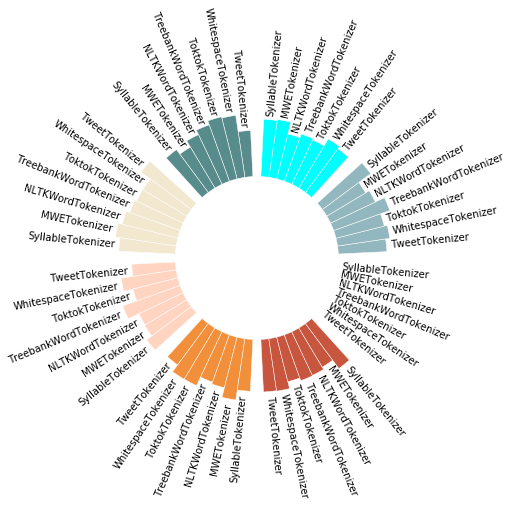

In [321]:
VALUES = perf_diff_df["mcc_diff"].values
LABELS = [lbl.split('_')[1] for lbl in perf_diff_df.index]#perf_diff_df.index
#LABELS = LABELS
GROUP = file2['technique'].unique()

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

#GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
GROUPS_SIZE = [7 for i in range(0,8)]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-60, 60)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [7 for i in range(0,8)]#[len(i[1]) for i in df.groupby("group")]
#COLORS = [C[i] for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES*100, width=WIDTH, color=C, 
    edgecolor="white", linewidth=0.5
)

add_labels(ANGLES[IDXS], VALUES*100, LABELS, OFFSET, ax)

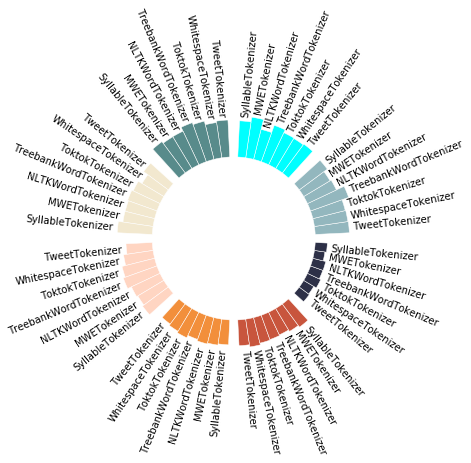

In [322]:
VALUES = perf_diff_df["mf1_diff"].values
LABELS = [lbl.split('_')[1] for lbl in perf_diff_df.index]#perf_diff_df.index
#LABELS = LABELS
GROUP = file2['technique'].unique()

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

#GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
GROUPS_SIZE = [7 for i in range(0,8)]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-60, 60)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [7 for i in range(0,8)]#[len(i[1]) for i in df.groupby("group")]
#COLORS = [C[i] for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES*100, width=WIDTH, color=C, 
    edgecolor="white", linewidth=0.5
)

add_labels(ANGLES[IDXS], VALUES*100, LABELS, OFFSET, ax)

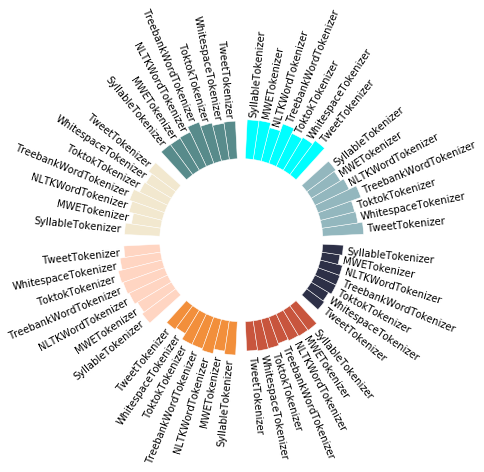

In [323]:
VALUES = perf_diff_df["wf1_diff"].values
LABELS = [lbl.split('_')[1] for lbl in perf_diff_df.index]#perf_diff_df.index
#LABELS = LABELS
GROUP = file2['technique'].unique()

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

#GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
GROUPS_SIZE = [7 for i in range(0,8)]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-60, 60)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [7 for i in range(0,8)]#[len(i[1]) for i in df.groupby("group")]
#COLORS = [C[i] for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES*100, width=WIDTH, color=C, 
    edgecolor="white", linewidth=0.5
)

add_labels(ANGLES[IDXS], VALUES*100, LABELS, OFFSET, ax)

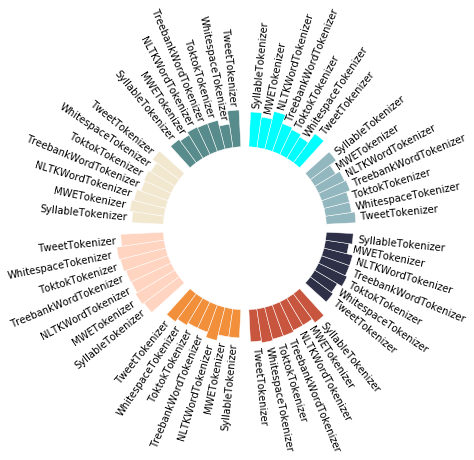

In [324]:
VALUES = perf_diff_df["acc_diff"].values
LABELS = [lbl.split('_')[1] for lbl in perf_diff_df.index]#perf_diff_df.index
#LABELS = LABELS
GROUP = file2['technique'].unique()

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

#GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
GROUPS_SIZE = [7 for i in range(0,8)]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-50, 50)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [7 for i in range(0,8)]#[len(i[1]) for i in df.groupby("group")]
#COLORS = [C[i] for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES*100, width=WIDTH, color=C, 
    edgecolor="white", linewidth=0.5
)

axx = add_labels(ANGLES[IDXS], VALUES*100, LABELS, OFFSET, ax)

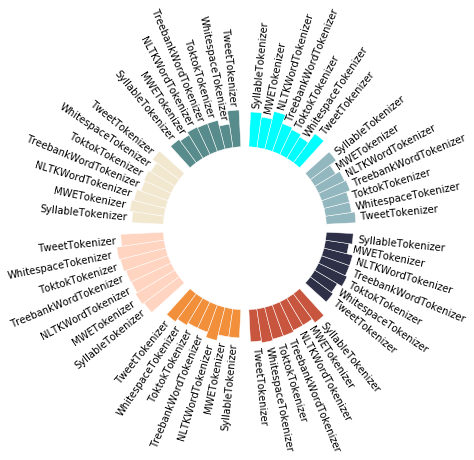

In [327]:
axx.figure
#plt.savefig('CMHS_PerDiff_acc.png',transparent=False,format='png',bbox_inches="tight", pad_inches=0)